In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_dir ="Significant Earthquake Dataset 1900-2023.csv"
df = pd.read_csv(data_dir)

In [3]:
df

,Time,Place,Latitude,Longitude,Depth,Mag,MagType,nst,gap,dmin,...,Updated,Unnamed: 14,Type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-02-17T09:37:34.868Z,"130 km SW of Tual, Indonesia",-6.5986,132.0763,38.615,6.10,mww,119.0,51.0,2.988,...,2023-02-17T17:58:24.040Z,NaN,earthquake,6.41,5.595,0.065,23.0,reviewed,us,us
1,2023-02-16T05:37:05.138Z,"7 km SW of Port-Olry, Vanuatu",-15.0912,167.0294,36.029,5.60,mww,81.0,26.0,0.392,...,2023-02-17T05:41:32.448Z,NaN,earthquake,5.99,6.080,0.073,18.0,reviewed,us,us
2,2023-02-15T18:10:10.060Z,"Masbate region, Philippines",12.3238,123.8662,20.088,6.10,mww,148.0,47.0,5.487,...,2023-02-16T20:12:32.595Z,NaN,earthquake,8.61,4.399,0.037,71.0,reviewed,us,us
3,2023-02-15T06:38:09.034Z,"54 km WNW of Otaki, New Zealand",-40.5465,174.5709,74.320,5.70,mww,81.0,40.0,0.768,...,2023-02-16T06:42:09.738Z,NaN,earthquake,3.68,4.922,0.065,23.0,reviewed,us,us
4,2023-02-14T13:16:51.072Z,"2 km NW of Lele?ti, Romania",45.1126,23.1781,10.000,5.60,mww,132.0,28.0,1.197,...,2023-02-17T09:15:18.586Z,NaN,earthquake,4.85,1.794,0.032,95.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37326,1902-01-01T05:20:30.000Z,"113 km ESE of Nikolski, Alaska",52.3800,-167.4500,NaN,7.00,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,NaN,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
37327,1901-12-31T09:02:30.000Z,"221 km SW of Nikolski, Alaska",51.4500,-171.0200,NaN,7.10,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,NaN,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
37328,1901-12-30T22:34:00.000Z,south of Alaska,52.0000,-160.0000,NaN,7.00,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,NaN,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
37329,1901-03-03T07:45:00.000Z,"12 km NNW of Parkfield, California",36.0000,-120.5000,NaN,6.40,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,NaN,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ell


In [4]:
df2 = df[['Latitude', 'Longitude', 'Depth', 'Mag']]
df2 = df2.dropna()
X = df2[['Latitude', 'Longitude', 'Depth']].values
y = df2['Mag'].values

In [5]:
# Dividir em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
# Conversão para tensores
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [7]:
# DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


In [8]:
# Definição do modelo
class EarthquakeNet(nn.Module):
    def __init__(self):
        super(EarthquakeNet, self).__init__()
        # Ajustando a arquitetura do modelo
        self.fc1 = nn.Linear(3, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.dropout(x)
        x = self.fc4(x)
        return x

model = EarthquakeNet()

In [9]:
# Função de perda e otimizador
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # Taxa de aprendizado reduzida


In [10]:
# Treinamento com parada antecipada
epochs = 500  
best_test_loss = float('inf')
patience = 50
train_losses = []
test_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    # Perda média de treinamento
    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # Perda de teste
    model.eval()
    with torch.no_grad():
        test_loss = criterion(model(X_test_tensor), y_test_tensor.unsqueeze(1)).item()
    test_losses.append(test_loss)
    
    # Salvando o melhor modelo
    if test_loss < best_test_loss:
        best_test_loss = test_loss
        torch.save(model.state_dict(), 'best_model.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss}, Test Loss: {test_loss}')

# Carregando o melhor modelo
model.load_state_dict(torch.load('best_model.pth'))


Epoch 1/500, Train Loss: 6.005245259500319, Test Loss: 0.3444036543369293
Epoch 2/500, Train Loss: 0.47132178647543793, Test Loss: 0.22230255603790283
Epoch 3/500, Train Loss: 0.41581320749816075, Test Loss: 0.22047343850135803
Epoch 4/500, Train Loss: 0.3974887555324903, Test Loss: 0.22438199818134308
Epoch 5/500, Train Loss: 0.38326122123067097, Test Loss: 0.22565698623657227
Epoch 6/500, Train Loss: 0.3653076745169137, Test Loss: 0.2518434226512909
Epoch 7/500, Train Loss: 0.3494056139902402, Test Loss: 0.24765680730342865
Epoch 8/500, Train Loss: 0.3380803774441442, Test Loss: 0.2530391216278076
Epoch 9/500, Train Loss: 0.3266729837143293, Test Loss: 0.3042280972003937
Epoch 10/500, Train Loss: 0.3251831527358742, Test Loss: 0.29137054085731506
Epoch 11/500, Train Loss: 0.31786997561813685, Test Loss: 0.263239324092865
Epoch 12/500, Train Loss: 0.31183664237940184, Test Loss: 0.35339292883872986
Epoch 13/500, Train Loss: 0.3092604926516933, Test Loss: 0.34911757707595825
Epoch 14/5

<All keys matched successfully>

In [11]:
# Avaliação
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor.unsqueeze(1))
print(f'Test Loss: {test_loss.item()}')

Test Loss: 0.19627328217029572


C:\Users\ingri\AppData\Local\Temp\ipykernel_12228\3135365008.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([real_values.min(), real_values.max()], [real_values.min(), real_values.max()], 'k--', lw=2, color = 'gray')  # Linha de identidade


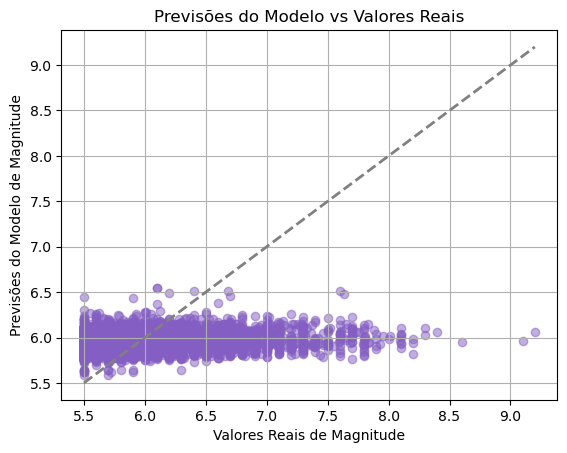

In [12]:
# Avaliação no conjunto de teste
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze()
    predicted_values = predictions.numpy()
    real_values = y_test_tensor.numpy()

# Plotagem do gráfico de Previsões do modelo x Valores reais
plt.scatter(real_values, predicted_values, alpha=0.5, color='#845EC2')
plt.title('Previsões do Modelo vs Valores Reais')
plt.xlabel('Valores Reais de Magnitude')
plt.ylabel('Previsões do Modelo de Magnitude')
plt.plot([real_values.min(), real_values.max()], [real_values.min(), real_values.max()], 'k--', lw=2, color = 'gray')  # Linha de identidade
plt.grid(True)
plt.show()

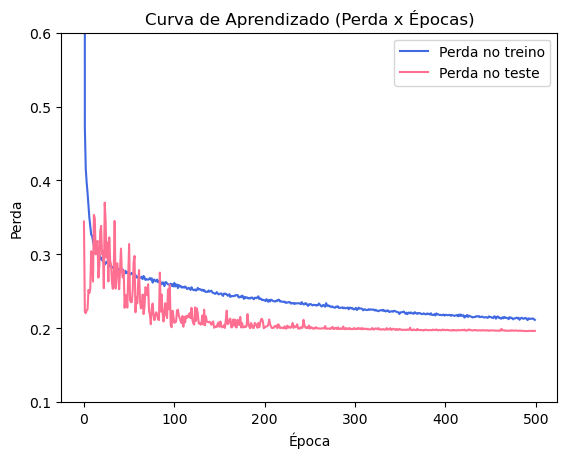

In [13]:
#Curva de Aprendizado
plt.plot(train_losses, label='Perda no treino', color = 'royalblue')
plt.plot(test_losses, label='Perda no teste', color = '#FF6F91')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Curva de Aprendizado (Perda x Épocas)')
plt.ylim(0.1, 0.6)
plt.legend()
plt.show()

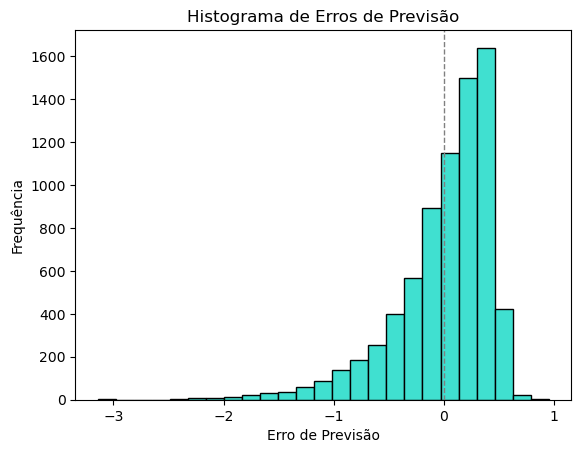

In [14]:
#Histograma de Erros de Previsão
errors = predictions.numpy() - y_test_tensor.numpy()
plt.hist(errors, bins=25, color='turquoise', edgecolor='black')  # Adicionando cor e borda aos bins
plt.xlabel('Erro de Previsão')
plt.ylabel('Frequência')
plt.title('Histograma de Erros de Previsão')
plt.axvline(errors.mean(), color='gray', linestyle='dashed', linewidth=1)  # Linha para a média dos erros
plt.show()

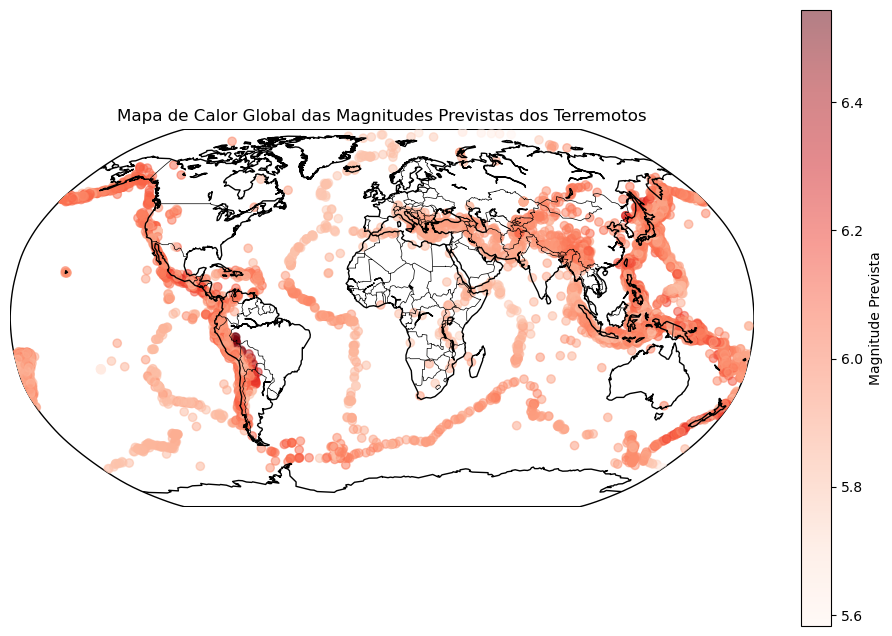

In [15]:
# Avaliação no conjunto de teste e coleta das previsões e localizações
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).squeeze()

# Convertendo as previsões para o formato numpy e coletando as latitudes e longitudes correspondentes
predicted_magnitudes = predictions.numpy()
latitudes = X_test[:, 0]  
longitudes = X_test[:, 1]  

# Plotagem do mapa de calor global das magnitudes previstas dos terremotos
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(12, 8))
m = Basemap(projection='robin', lon_0=0, resolution='c')
m.drawcoastlines()
m.drawcountries()

# Convertendo as coordenadas para o sistema de projeção do mapa
x, y = m(longitudes, latitudes)

# Plotando as magnitudes previstas
sc = m.scatter(x, y, c=predicted_magnitudes, cmap='Reds', alpha=0.5)

# Adicionando uma barra de cores
plt.colorbar(sc, label='Magnitude Prevista')
plt.title('Mapa de Calor Global das Magnitudes Previstas dos Terremotos')
plt.show()
